In [25]:
import csv
import json
import pickle
import numpy as np
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import maxabs_scale
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Preprocess data
def preprocess(tweets):
    REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
    REPLACE_USER = re.compile("@.+?\s")
    tweets = [REPLACE_NO_SPACE.sub("", line.lower()) for line in tweets]
    tweets = [REPLACE_USER.sub("@_ ", line.lower()) for line in tweets]
    return tweets

In [19]:
def get_feats(tweets):
    feats = cv.transform(tweets)
    feats = maxabs_scale(feats)
    return feats

In [15]:
cv = pickle.load(open("vectorizer.p", "rb"))
final_model = pickle.load(open("model.p", "rb"))

In [16]:
# Load movie data
movie_tweets = json.load(open("movie_data/movie_tweets_week_no_bots.json", "r"))

In [17]:
movie_scores = {}

In [20]:
# Get average sentiment for each movie
for movie, data in sorted(movie_tweets.items(), key=lambda x:x[0]):
    tweets = [tweet["text"] for tweet in data]
    feats = get_feats(tweets)
    preds = final_model.predict(feats)
    movie_scores[movie] = [np.mean(preds, axis=0), None, None]
    print(movie, np.mean(preds, axis=0))

Ad Astra 0.8525547445255475
Angel Has Fallen 0.7612809315866085
Avengers: Endgame 0.7870778267254038
Birds of Prey 0.7630813953488372
Coffee & Kareem 0.8998548621190131
Detective Pikachu 0.7844574780058651
Frozen II 0.677891654465593
Gemini Man 0.8755555555555555
Hobbs & Shaw 0.8798219584569733
Jojo Rabbit 0.7630813953488372
Klaus 0.7260869565217392
Knives Out 0.7687861271676301
Marriage Story 0.8819241982507289
Queen & Slim 0.7341040462427746
Spies in Disguise 0.9116766467065869
The Irishman 0.7787481804949054
The Two Popes 0.927437641723356
Trolls World Tour 0.8125
Uncut Gems 0.8175287356321839
Vivarium 0.7979502196193266


In [23]:
with open("movie_data/movie_info.csv", "r") as review_file:
    review_reader = csv.reader(review_file)
    next(review_reader)
    for row in review_reader:
        movie_scores[row[0]][1] = int(row[5])/100
        movie_scores[row[0]][2] = int(row[4])/100

Correlation =  -0.31160488460842717
p-value     =  0.18109360028630442


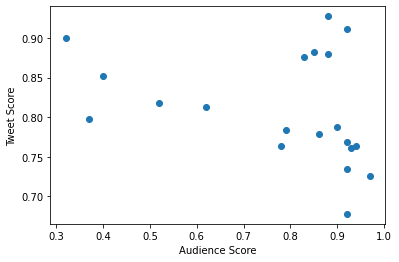

In [26]:
x = [score[1] for score in movie_scores.values()]
y = [score[0] for score in movie_scores.values()]
corr, p = pearsonr(x, y)
print("Correlation = ", corr)
print("p-value     = ", p)
plt.scatter(x, y)
plt.xlabel("Audience Score")
plt.ylabel("Tweet Score")
plt.show()

Correlation =  -0.27093134246644945
p-value     =  0.24792832091473613


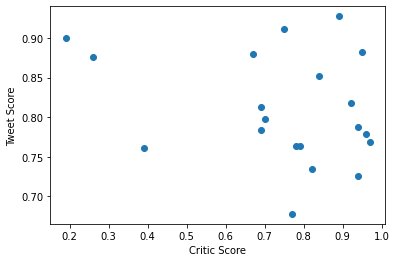

In [27]:
x = [score[2] for score in movie_scores.values()]
y = [score[0] for score in movie_scores.values()]
corr, p = pearsonr(x, y)
print("Correlation = ", corr)
print("p-value     = ", p)
plt.scatter(x, y)
plt.xlabel("Critic Score")
plt.ylabel("Tweet Score")
plt.show()